<a href="https://colab.research.google.com/github/tanzeelazaheer82-art/ML-DL-PROJECTS/blob/main/cats_vs_dogs_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installing the Kaggle library
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 dogs-vs-cats.zip   kaggle.json   sampleSubmission.csv	 train
'image resized'     sample_data   test1.zip		 train.zip


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.9925.jpg', 'cat.8736.jpg', 'cat.10127.jpg', 'cat.7527.jpg', 'cat.796.jpg', 'dog.5717.jpg', 'dog.1086.jpg', 'dog.1897.jpg', 'dog.1420.jpg', 'cat.6182.jpg', 'dog.9503.jpg', 'dog.2022.jpg', 'dog.9695.jpg', 'dog.10006.jpg', 'cat.6768.jpg', 'cat.4816.jpg', 'dog.4905.jpg', 'dog.11166.jpg', 'dog.625.jpg', 'dog.1205.jpg', 'dog.11518.jpg', 'cat.3877.jpg', 'cat.656.jpg', 'cat.6306.jpg', 'cat.2606.jpg', 'cat.11180.jpg', 'dog.5854.jpg', 'dog.9666.jpg', 'dog.11917.jpg', 'dog.6066.jpg', 'dog.7265.jpg', 'cat.5207.jpg', 'dog.750.jpg', 'cat.3339.jpg', 'dog.1621.jpg', 'cat.8758.jpg', 'cat.6466.jpg', 'cat.3215.jpg', 'dog.10958.jpg', 'cat.5674.jpg', 'cat.4005.jpg', 'dog.1975.jpg', 'dog.8958.jpg', 'dog.5112.jpg', 'cat.3069.jpg', 'dog.2765.jpg', 'cat.11589.jpg', 'cat.10465.jpg', 'dog.10504.jpg', 'cat.9259.jpg', 'cat.3050.jpg', 'dog.4779.jpg', 'cat.10932.jpg', 'cat.3549.jpg', 'dog.9805.jpg', 'cat.9952.jpg', 'dog.10719.jpg', 'cat.7373.jpg', 'dog.5140.jpg', 'dog.12327.jpg', 'cat.6692.jpg', 'dog.5025.jpg'

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

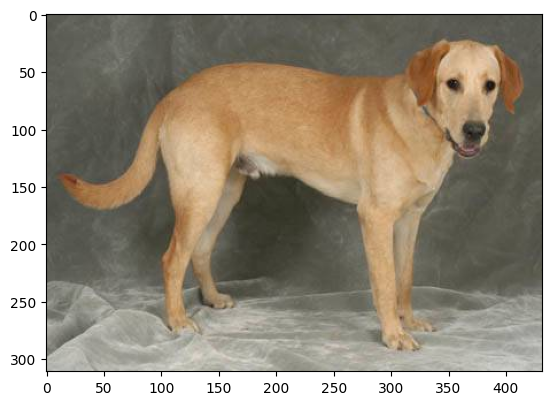

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.5717.jpg')
imgplt = plt.imshow(img)
plt.show()

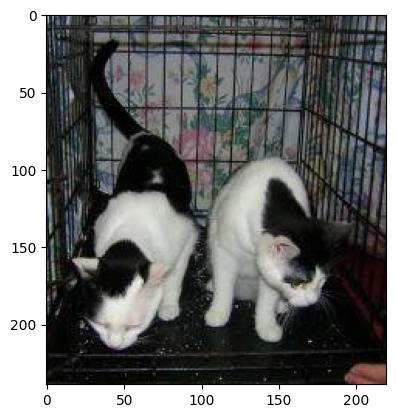

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.10127.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



dog
cat
cat
cat
cat


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [ ]:
import os

# Define the directory path for resized images
resized_images_dir = '/content/image resized'

# Create the directory, ignore if it exists
os.makedirs(resized_images_dir, exist_ok=True)

# Confirm directory creation
print(f"Directory {resized_images_dir} is ready for use.")


Directory /content/image resized is ready for use.


In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

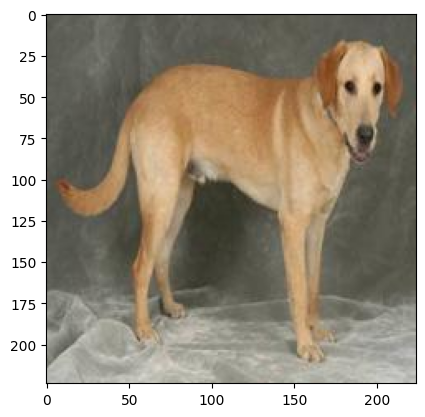

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.5717.jpg')
imgplt = plt.imshow(img)
plt.show()

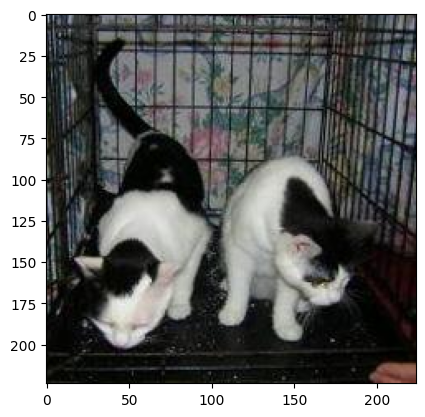

In [ ]:
# display  resized cat image
img = mpimg.imread('/content/image resized/cat.10127.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['dog.9925.jpg', 'cat.8736.jpg', 'cat.10127.jpg', 'cat.7527.jpg', 'cat.796.jpg']
2001


In [ ]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 0, 0]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 996 1004]


In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[ 17  20  25]
   [ 17  20  25]
   [ 19  22  27]
   ...
   [ 30  48  59]
   [ 28  46  57]
   [ 26  44  55]]

  [[ 20  23  28]
   [ 20  23  28]
   [ 21  24  29]
   ...
   [ 33  51  62]
   [ 31  49  60]
   [ 29  47  58]]

  [[ 20  23  28]
   [ 21  24  29]
   [ 22  25  30]
   ...
   [ 42  60  71]
   [ 40  58  69]
   [ 39  57  68]]

  ...

  [[ 36  61 111]
   [ 41  66 116]
   [ 32  57 107]
   ...
   [ 22  48  88]
   [ 20  46  86]
   [ 17  43  83]]

  [[ 37  62 112]
   [ 38  63 113]
   [ 27  52 102]
   ...
   [ 24  50  90]
   [ 18  44  84]
   [ 11  37  77]]

  [[ 36  61 111]
   [ 35  60 110]
   [ 24  49  99]
   ...
   [ 26  52  92]
   [ 17  43  83]
   [  7  33  73]]]


 [[[122 136 194]
   [123 138 194]
   [139 153 202]
   ...
   [ 50  47  33]
   [ 48  46  35]
   [ 49  47  36]]

  [[120 134 192]
   [117 133 186]
   [127 141 190]
   ...
   [ 52  50  39]
   [ 51  49  38]
   [ 51  51  39]]

  [[134 149 205]
   [129 145 198]
   [138 152 201]
   ...
   [ 54  53  43]
   [ 53  52  42]
   [ 51  52

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.0627451  0.07058824 0.07058824]
   [0.05490196 0.0627451  0.0627451 ]
   [0.04705882 0.05490196 0.05490196]
   ...
   [0.11372549 0.10196078 0.27843137]
   [0.13333333 0.11764706 0.27843137]
   [0.1254902  0.11764706 0.25882353]]

  [[0.05882353 0.06666667 0.06666667]
   [0.05490196 0.0627451  0.0627451 ]
   [0.04313725 0.05098039 0.05098039]
   ...
   [0.11764706 0.10588235 0.28235294]
   [0.12156863 0.10980392 0.2627451 ]
   [0.11372549 0.10980392 0.24313725]]

  [[0.05490196 0.0627451  0.0627451 ]
   [0.05098039 0.05882353 0.05882353]
   [0.03921569 0.04705882 0.04705882]
   ...
   [0.10588235 0.09019608 0.25098039]
   [0.09803922 0.08235294 0.22352941]
   [0.09803922 0.08627451 0.21176471]]

  ...

  [[0.55686275 0.55686275 0.58039216]
   [0.56470588 0.56470588 0.58823529]
   [0.56862745 0.56862745 0.59215686]
   ...
   [0.50980392 0.48235294 0.50980392]
   [0.51764706 0.49019608 0.51764706]
   [0.51372549 0.48627451 0.51372549]]

  [[0.57647059 0.57647059 0.6       ]
   [0.5

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 66s 1s/step - loss: 0.2284 - acc: 0.8931
Epoch 2/5
50/50 [==============================] - 66s 1s/step - loss: 0.0659 - acc: 0.9775
Epoch 3/5
50/50 [==============================] - 61s 1s/step - loss: 0.0461 - acc: 0.9881
Epoch 4/5
50/50 [==============================] - 62s 1s/step - loss: 0.0356 - acc: 0.9912
Epoch 5/5
50/50 [==============================] - 62s 1s/step - loss: 0.0295 - acc: 0.9919


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 14s 947ms/step - loss: 0.0759 - acc: 0.9800
Test Loss = 0.07586885243654251
Test Accuracy = 0.9800000190734863


Path of the image to be predicted: /content/dog.jpg


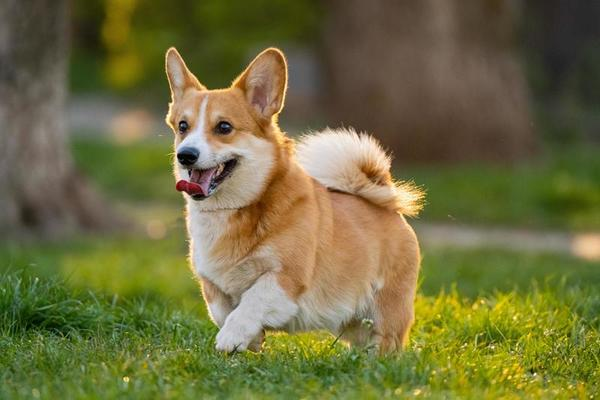

1/1 [==============================] - 1s 937ms/step
[[-1.859519    0.29968518]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


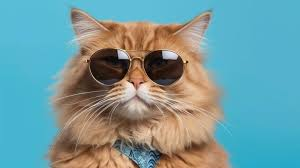

1/1 [==============================] - 0s 93ms/step
[[ 2.5097666 -2.0901065]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

# New Section